<a href="https://colab.research.google.com/github/men-ka/data-science-111/blob/main/day7_featureEngg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

transform raw data into features, helps models better understand and learn from the data. Good feature engineering = better model performance and accuracy.

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load data
url = "https://raw.githubusercontent.com/sc0609/Netflix_Data/refs/heads/main/netflix_titles.csv"
df = pd.read_csv(url)

In [3]:
# Drop rows with missing key values (optional for clean examples)
df = df.dropna(subset=['type', 'rating', 'country'])

In [4]:
# Label Encode 'type' (Movie/TV Show)
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])


In [5]:
# One-Hot Encode 'rating'
rating_dummies = pd.get_dummies(df['rating'], prefix='rating')
df = pd.concat([df, rating_dummies], axis=1)

In [14]:
#'country': top 5 + 'Other'
top_countries = df['country'].value_counts().nlargest(5).index
df['country_simplified'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

In [8]:
# One-Hot Encode simplified 'country'
country_dummies = pd.get_dummies(df['country_simplified'], prefix='country')
df = pd.concat([df, country_dummies], axis=1)


In [9]:
# Check final encoded columns
print(df[['type', 'type_encoded']].head())
print(df.filter(like='rating_').head())
print(df.filter(like='country_').head())

      type  type_encoded
0    Movie             0
1  TV Show             1
4  TV Show             1
7    Movie             0
8  TV Show             1
   rating_66 min  rating_74 min  rating_84 min  rating_G  rating_NC-17  \
0          False          False          False     False         False   
1          False          False          False     False         False   
4          False          False          False     False         False   
7          False          False          False     False         False   
8          False          False          False     False         False   

   rating_NR  rating_PG  rating_PG-13  rating_R  rating_TV-14  rating_TV-G  \
0      False      False          True     False         False        False   
1      False      False         False     False         False        False   
4      False      False         False     False         False        False   
7      False      False         False     False         False        False   
8      False   

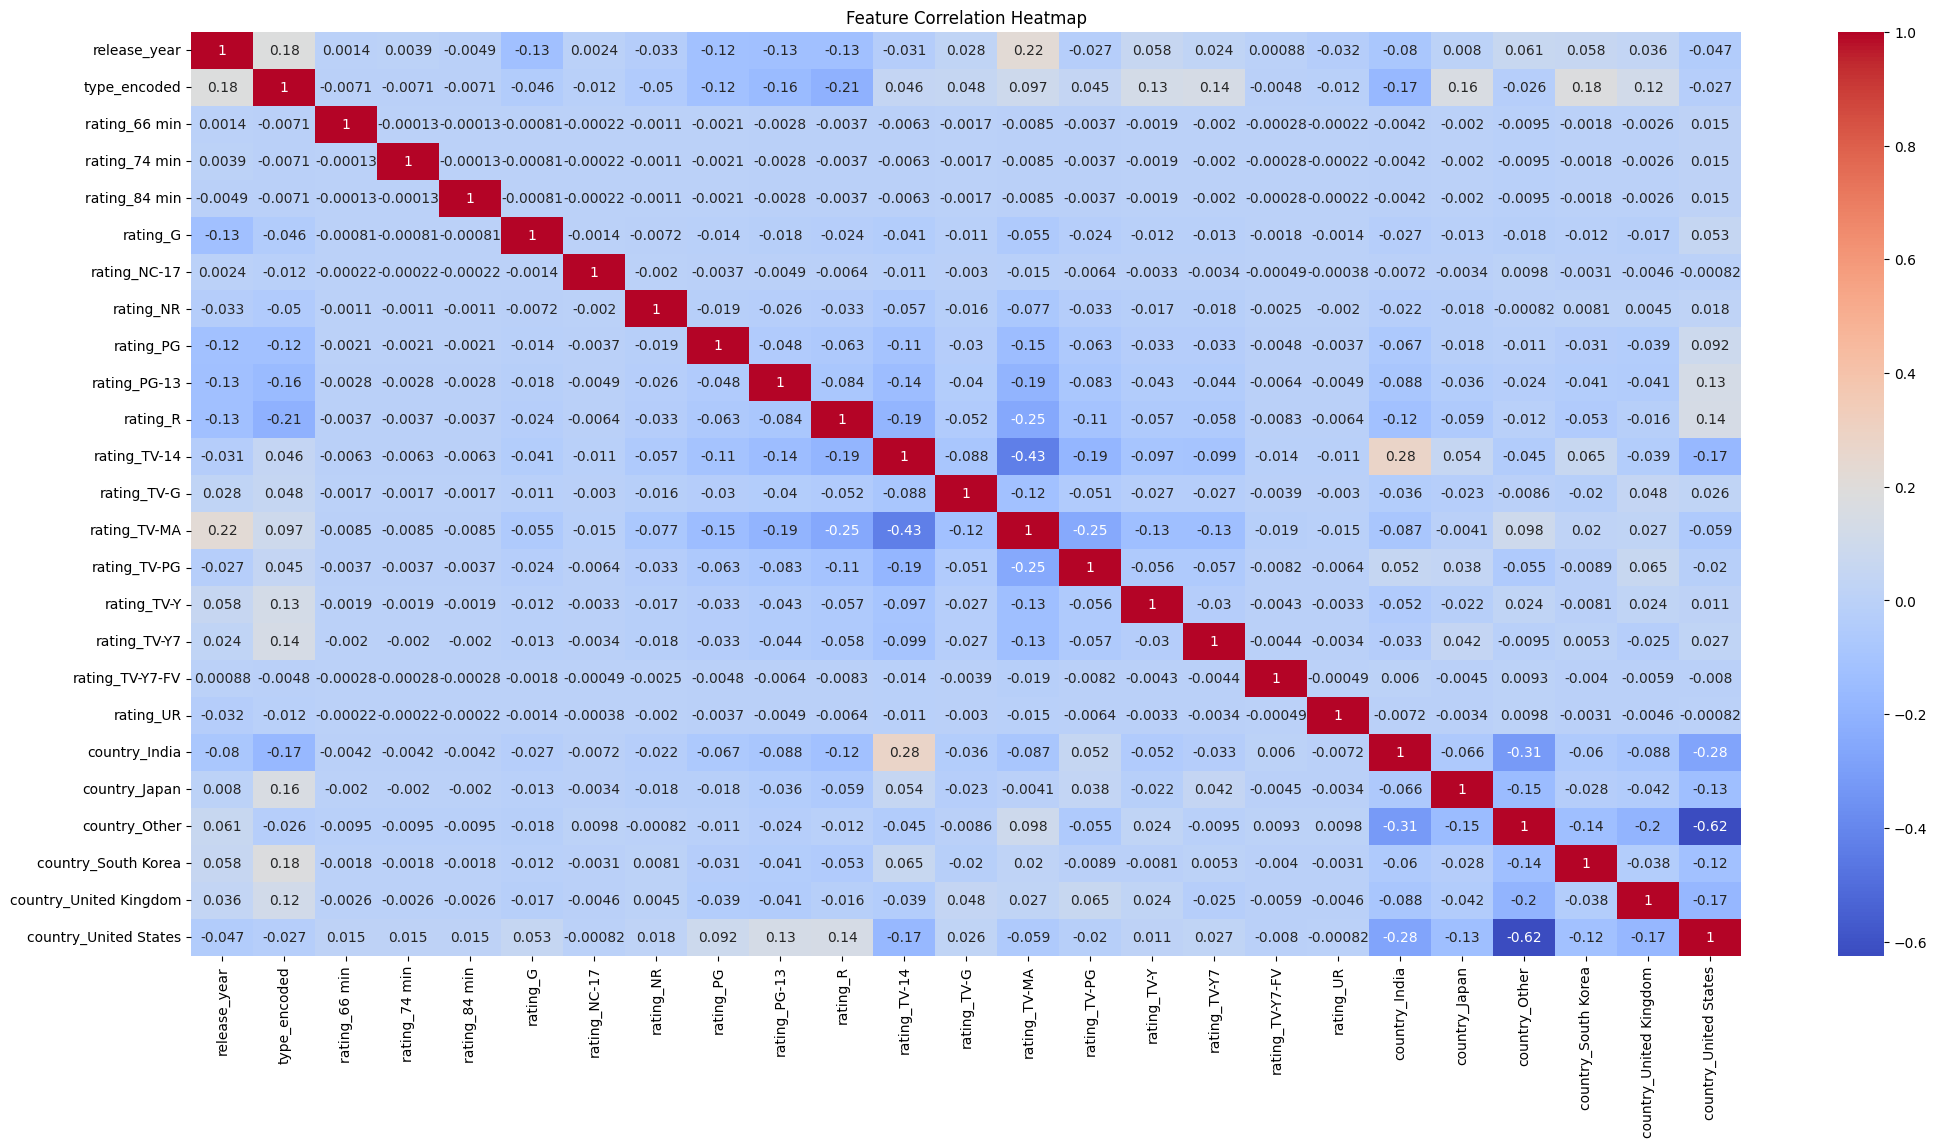

In [12]:


plt.figure(figsize=(25,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()